In [3]:
# IMPORT LIBRARY
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

In [5]:
# LOAD THE DATA
data = pd.read_csv("/kaggle/input/russia-vs-ukraine-tweets-datasetdaily-updated/filename.csv")
print(data.head())

                    id      conversation_id               created_at  \
0  1615148137781272577  1615029001268994048  2023-01-17 00:44:58 UTC   
1  1615148135969443840  1615148135969443840  2023-01-17 00:44:58 UTC   
2  1615148131896946688  1615148131896946688  2023-01-17 00:44:57 UTC   
3  1615148130789429248  1615148130789429248  2023-01-17 00:44:57 UTC   
4  1615148130709676033  1615134717422059525  2023-01-17 00:44:57 UTC   

         date      time  timezone              user_id      username  \
0  2023-01-17  00:44:58         0  1500544840542699533     1un4rh4yy   
1  2023-01-17  00:44:58         0           2156204448    darla_1994   
2  2023-01-17  00:44:57         0            994043419    thatsnokay   
3  2023-01-17  00:44:57         0  1483260398409236481       tcdms99   
4  2023-01-17  00:44:57         0           1444070473  steve_kostyk   

                 name place  ... geo source user_rt_id user_rt retweet_id  \
0    estradiol tomboy   NaN  ... NaN    NaN        NaN   

In [7]:
# LET LOOK AT THE COLUMNS OR FEATURES
data.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [8]:
len(data.columns)

36

In [10]:
# WE DONT NEED TO HAVE ALL THIS COLUMN FOR OUR ANALYSIS
# WE NEED ONLY THREE COLUMNS---> username, tweet, language
data = data[['username', 'tweet','language']]

In [11]:
data.head(5)

,username,tweet,language
0,1un4rh4yy,@imakuni1996 @thinktankee Russia’s support of ...,en
1,darla_1994,“The Divinely Kingdom has a lot to do with the...,en
2,thatsnokay,Deport “George Santos” to Russia,en
3,tcdms99,2023 Outlook for America Biden Vetos any bill...,en
4,steve_kostyk,@VladaKnowlton @JuliaDavisNews They are a hide...,en


In [12]:
# LET LOOK WETHER THE COLUMN HAS A NULL VALUES OR NOT
data.isnull().sum()

username    0
tweet       0
language    0
dtype: int64

In [13]:
# CHECK HOW MANY  TWEETS HAS BEEN POSTED WITH RESPECTIVE LANGAUAGE
data['language'].value_counts()

en     8900
pt      270
und     200
it      183
qme     107
ca       49
in       44
ru       41
es       30
fi       27
qht      22
ja       20
de       15
fr       15
pl       11
nl       11
th       10
uk        9
cs        6
ro        6
qam       5
vi        4
et        3
no        3
zh        2
tl        2
da        2
sv        2
ar        2
el        2
bg        2
tr        2
hu        1
sr        1
Name: language, dtype: int64

In [16]:
# most of  the tweets are in english. lets prepare this data for the task of 
# sentiment analysis. 
# here I will remove all the links, punctuation, symbols and other language errors
nltk.download("stopwords")
stemmer = nltk.stem.PorterStemmer()
stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
# TEXT CLEANING FUNCTIONS
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+','',text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '',text)
    text = re.sub('\n','', text)
    text = re.sub('\w*\d\w*','', text)
    text = [word for word in text.split(' ') if word not in stopwords]
    text = " ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text = " ".join(text)
    return text

In [18]:
data['tweet'] = data['tweet'].apply(clean)

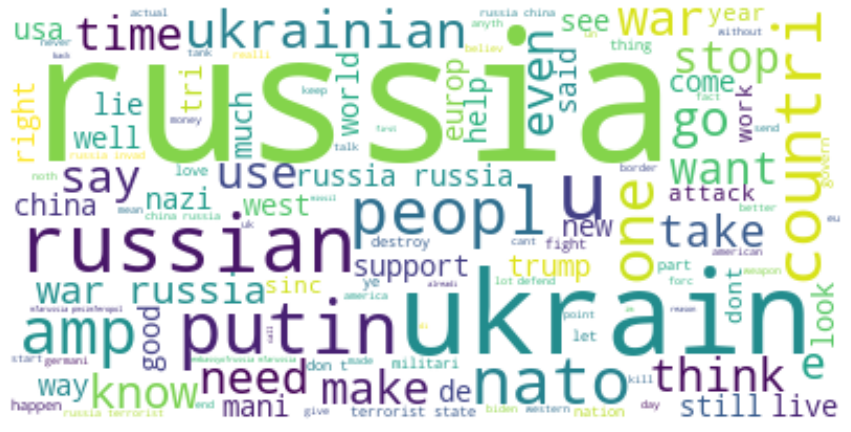

In [26]:
# LET US CHECK THE MOST FREQUENT WORDS 
text = " ".join(i for i in data.tweet)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords = stopwords, background_color = "white").generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()


In [27]:
# CALCULATING THE SENTIMENT SCORE OF THE TWEETS
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data['Positive'] = [sentiments.polarity_scores(i)["pos"] for i  in data.tweet]
data['Negative'] = [sentiments.polarity_scores(i)["neg"] for i  in data.tweet]
data['Neutral'] = [sentiments.polarity_scores(i)["neu"] for i  in data.tweet]

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [29]:
data = data[['tweet','Positive', 'Negative', 'Neutral']]

In [31]:
data.head()

,tweet,Positive,Negative,Neutral
0,thinktanke russia’ support fascist region doe...,0.128,0.285,0.587
1,“the divin kingdom lot understand numer realm ...,0.000,0.115,0.885
2,deport “georg santos” russia,0.000,0.000,1.000
3,outlook america biden veto bill relat americ...,0.000,0.188,0.812
4,vladaknowlton juliadavisnew hideou brood viper...,0.000,0.000,1.000


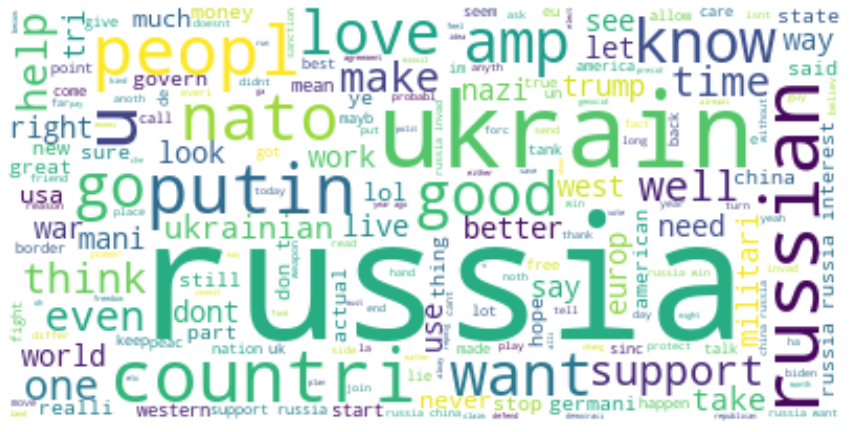

In [32]:
# MOST FREQUEINT WORDS IN POSITIVE SENTIMENT
positive = ' '.join([i for i in data['tweet'][data['Positive']>data['Negative']]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords = stopwords, background_color = "white").generate(positive)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

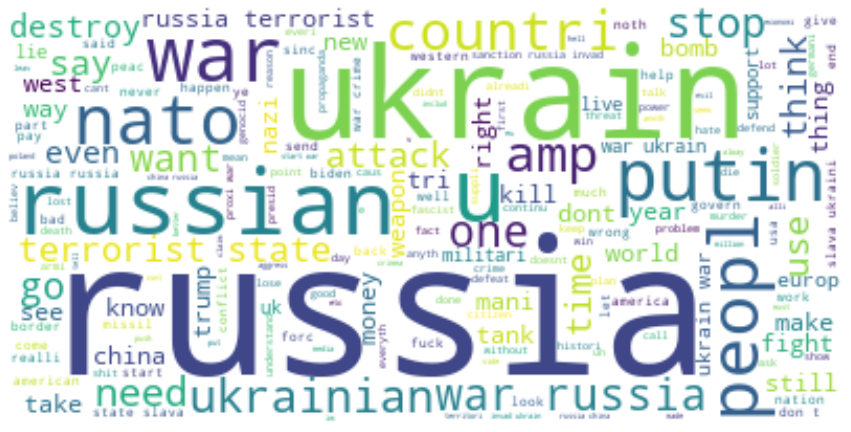

In [33]:
# MOST FREQUEINT WORDS IN NEGATIVE SENTIMENT
negative = ' '.join([i for i in data['tweet'][data['Positive']<data['Negative']]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords = stopwords, background_color = "white").generate(negative)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# THE END